In [14]:
# Importing necessary libraries for the code
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import numpy as np  # Importing numpy for numerical computing
import os  # Importing os for interacting with the operating system
import PIL  # Importing Python Imaging Library for image processing
import tensorflow as tf  # Importing TensorFlow library for building and training deep learning models
from tensorflow import keras  # Importing Keras from TensorFlow for building neural networks
from tensorflow.keras import layers  # Importing layers from Keras for creating different layers in a neural network
from tensorflow.python.keras.layers import Dense, Flatten  # Importing Dense and Flatten layers from Keras for the neural network
from tensorflow.keras.models import Sequential  # Importing Sequential from Keras to build a sequential model
from tensorflow.keras.optimizers import Adam  # Importing Adam optimizer from Keras for model optimization


**Preparing Data**

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path (data_dir)

228813984/228813984 [==============================] - 8s 0us/step


In [4]:
print(data_dir)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/roses/921984328_a60076f070_m.jpg


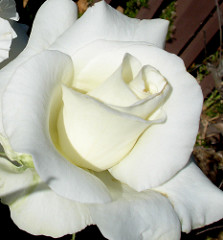

In [5]:
# roses file
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses [0]))

**Training and Testing data**

In [15]:
img_height, img_width=180, 180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, # training split
    subset="training",
    seed=123, #  ensures random splitting of the data into training and validation sets remains consistent
    label_mode= 'categorical', #diferrent classes
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123, label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
#printing folder names
class_names = train_ds.class_names
print (class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**Training the model**

In [13]:
# Creating an empty neural network model using the Sequential API
resnet_model = Sequential() # its an empty neural network and in sequence

# Loading the ResNet50 model with specific configurations
pretrained_model= tf.keras.applications.ResNet50(
    include_top=False, # excluding the top classification layers
    input_shape= (180, 180, 3), # setting the input shape to (180, 180, 3)
    pooling='avg', # using average pooling
    classes=5, # specifying 5 output classes
    weights='imagenet' # using pre-trained weights from the ImageNet dataset
) # same weights used when training resnet50 earlier

# Freezing the layers of the pre-trained ResNet50 model
for layer in pretrained_model.layers:
    layer.trainable=False

# Adding the pre-trained ResNet50 model to the resnet_model
resnet_model.add(pretrained_model)

# Adding a Flatten layer to convert the data into a 1D array
resnet_model.add(Flatten())

# Adding a Dense layer with 512 units and ReLU activation function
resnet_model.add(Dense (512, activation='relu'))

# Adding the final Dense layer with 5 units and softmax activation function
resnet_model.add(Dense(5, activation='softmax'))


In [16]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_4 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_5 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [20]:
# Compiling the model with specific configurations for training
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001), # using the Adam optimizer with a learning rate of 0.001
    loss='categorical_crossentropy', # using categorical crossentropy as the loss function for multi-class classification
    metrics=['accuracy'] # tracking the accuracy metric during the training process
)

In [22]:
epochs = 10  # number of training epochs

# Training the model with the specified number of epochs and using the training and validation datasets
history = resnet_model.fit(
    train_ds,  # training dataset
    validation_data=val_ds,  # validation dataset
    epochs=epochs  # the number of epochs for training
)


Epoch 1/10
27/92 [=======>......................] - ETA: 5:05 - loss: 0.0025 - accuracy: 1.0000

KeyboardInterrupt: ignored

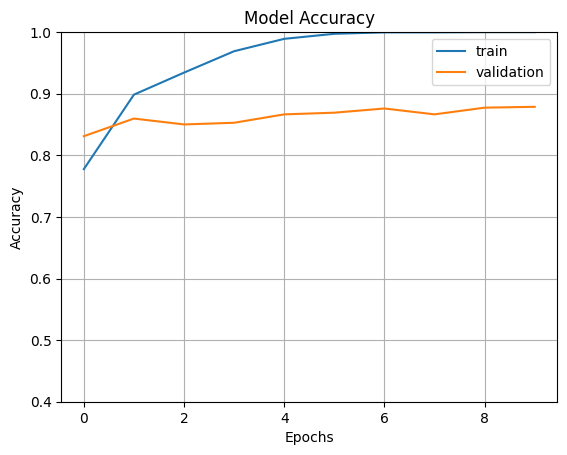

In [23]:
# Getting the current figure for the plot
fig1 = plt.gcf()

# Plotting the training accuracy
plt.plot(history.history['accuracy'])

# Plotting the validation accuracy
plt.plot(history.history['val_accuracy'])

# Setting the y-axis limits for better visualization
plt.axis(ymin=0.4, ymax=1)

# Adding a grid to the plot
plt.grid()

# Adding a title to the plot
plt.title('Model Accuracy')

# Adding a label to the y-axis
plt.ylabel('Accuracy')

# Adding a label to the x-axis
plt.xlabel('Epochs')

# Adding a legend to differentiate between training and validation
plt.legend(['train', 'validation'])

# Displaying the plot
plt.show()

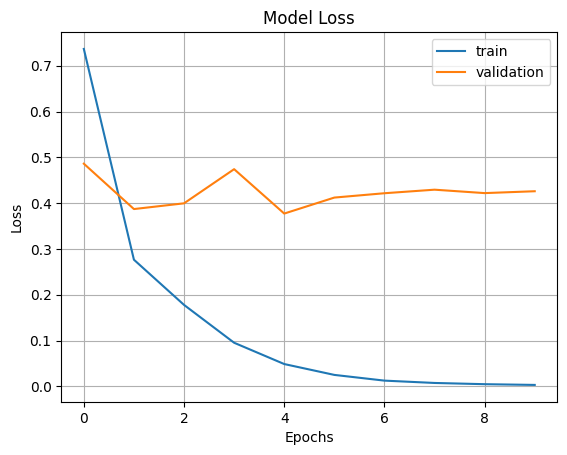

In [24]:
import matplotlib.pyplot as plt

# Plotting the training loss
plt.plot(history.history['loss'])

# Plotting the validation loss
plt.plot(history.history['val_loss'])

# Adding a grid to the plot
plt.grid()

# Setting the title for the plot
plt.title('Model Loss')

# Adding label for the y-axis
plt.ylabel('Loss')

# Adding label for the x-axis
plt.xlabel('Epochs')

# Adding a legend to differentiate between training and validation data
plt.legend(['train', 'validation'])

# Displaying the plot
plt.show()


**Making Predictions**

In [25]:
import cv2

# Reading the image using OpenCV
image = cv2.imread(str(roses[0]))

# Resizing the image to the specified dimensions
image_resized = cv2.resize(image, (img_height, img_width))

# Adding an extra dimension to the image to match the model's input shape
image = np.expand_dims(image_resized, axis=0)

# Printing the shape of the image
print(image.shape)

(1, 180, 180, 3)


In [26]:
# Making predictions using the resnet_model on a specific image
pred = resnet_model.predict(image)  # obtaining predictions for the input image

# Printing the predictions
print(pred)  # displaying the predicted values

1/1 [==============================] - 3s 3s/step
[[1.9472325e-10 1.8596798e-13 1.0000000e+00 2.4898525e-12 5.7165202e-08]]


In [27]:
# Retrieving the predicted class name from the array of class names based on the index with the highest predicted probability
output_class = class_names[np.argmax(pred)]

# Printing the predicted class
print("The predicted class is", output_class)

The predicted class is roses
